---
title: 9.1 注意力机制
date: 2024-5-28 11:00:00
tags: [机器学习,pytorch]
categories: [机器学习]
comment: true
toc: true
---
#  
<!--more-->
# 1 注意力机制

- 视觉系统接受了大量的感官输入，这些感官输入远远超过了大脑能够完全处理的程度。然而，并非所有刺激的影响都是相等的。意识的聚集和专注使灵长类动物能够在复杂的视觉环境中将注意力引向感兴趣的物体，例如猎物和天敌。只关注一小部分信息的能力对进化更加有意义，使人类得以生存和成功。

## 1.1 生物学中的注意力提示

- 双组件（two‐component）的框架：在这个框架中，受试者基于非自主性提示和自主性提示有选择地引导注意力的焦点。

    - 非自主性提示是基于环境中物体的突出性和易见性，比如三本黑色的书和一本红色的书，红色突出，容易引起注意。

    - 依赖于任务的意志提示（想读一本书），注意力被自主引导到书上。

## 1.2 查询、键和值

- 自主性的与非自主性的注意力提示解释了人类的注意力的方式，下面来看看如何通过这两种注意力提示，用神经网络来设计注意力机制的框架

    - 首先，考虑一个相对简单的状况，即只使用非自主性提示。想将选择偏向于感官输入，则可以简单地使用参数化的**全连接层**，甚至是非参数化的**最大汇聚层**或**平均汇聚层**。

    - 因此，“是否包含自主性提示”将注意力机制与**全连接层**或**汇聚层**区别开来。在注意力机制的背景下，自主性提示被称为**查询**（query）。
    
    - 给定任何查询，注意力机制通过注意力汇聚（attention pooling）将选择引导至感官输入（sensory inputs，例如中间特征表示）。在注意力机制中，这些感官输入被称为**值**（value）。

    - 更通俗的解释，每个值都与一个键（key）配对，这可以想象为感官输入的非自主提示。

    - 可以通过设计注意力汇聚的方式，便于给定的查询（自主性提示）与键（非自主性提示）进行匹配，这将引导得出最匹配的值（感官输入）。

    ![](../../../../../../themes/yilia/source/img/deeplearning/code/pytorch/9_attention/1_attention_cues/1.png)
    ![](img/deeplearning/code/pytorch/9_attention/1_attention_cues/1.png)

    - 提供一个自主性提示，然后提供多个非自主性提示，一个非自主性提示与自主性提示匹配，得到一个值（一一对应）。


## 1.3 注意力的可视化

- 平均汇聚层：输入的加权平均值，其中各输入的权重是一样的。实际上，注意力汇聚得到的是加权平均的总和值，其中权重是在给定的查询和不同的键之间计算得出的。


In [7]:
import torch
from d2l import torch as d2l

- 定义show_heatmaps函数，用于可视化注意力权重，

In [8]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    # matrices形状：（要显示的行数，要显示的列数，查询的数目，键的数目）。
    '''显示矩阵热图'''
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    # print(num_rows, num_cols) # 2，2
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    # print(axes.shape) # (2，2)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        # print(row_matrices.shape,sep='\n') #(2,10,10)
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            # print(matrix.shape) # (10,10)
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

- 例子，仅当查询和键相同时，注意力权重为1，否则为0。


torch.Size([2, 2, 10, 10])


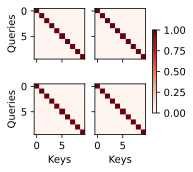

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

# attention_weights = torch.eye(10).reshape((1, 1, 10, 10)) # 对角矩阵
# x = torch.eye(10)
# y = torch.stack([x,x],0)
# attention_weights = torch.stack([y,y],0)
# attention_weights = torch.stack([attention_weights, attention_weights], 0)

attention_weights = torch.eye(10).unsqueeze(0).unsqueeze(0).repeat(2, 2, 1, 1)

print(attention_weights.shape)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')